This is the first deep learning project.In this notebook , I am going to implement AA from the scratch

In [1]:
# Artificial Neural Network


# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
dataset = pd.read_csv('/home/sakil/Desktop/DeepLearningProjects/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#selecting features from 3 to 13
X = dataset.iloc[:, 3:13]
#storing target variable in y
y = dataset.iloc[:, 13]

In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [7]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
#Dense is used for creating layers in deep learning
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.
/home/sakil/anaconda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sakil/anaconda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sakil/anaconda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sakil/anaconda/lib/python3.7/site-packages/tensorflow/py

In [11]:
# Initialising the ANN
classifier = Sequential()

In [12]:
# Adding the input layer and the first hidden layer
#we are giving output_dim=6,input_dim=11 as we have 11 input features
#we are using init='he_uniform'initialization,we are using activation='relu',generally relu performs well
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))

/home/sakil/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  


In [13]:
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))

/home/sakil/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  


In [14]:
# Adding the output layer
#as output layer will be 1 so we are using output_dim=1
#In output layer case , we are using activation function=sigmoid
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))


/home/sakil/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  


In [15]:
# Compiling the ANN
#here we are uisng opimizer=Adamax,loss=binary_crossentropy as it is binary classification
#metrics=accuracy
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
# Fitting the ANN to the Training set
#we are making model
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)


/home/sakil/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 3s 517us/step - loss: 0.6451 - accuracy: 0.7016 - val_loss: 0.5315 - val_accuracy: 0.8005
Epoch 2/100
5359/5359 [==============================] - 2s 306us/step - loss: 0.4925 - accuracy: 0.8015 - val_loss: 0.4690 - val_accuracy: 0.8031
Epoch 3/100
5359/5359 [==============================] - 2s 298us/step - loss: 0.4525 - accuracy: 0.8108 - val_loss: 0.4521 - val_accuracy: 0.8080
Epoch 4/100
5359/5359 [==============================] - 2s 297us/step - loss: 0.4372 - accuracy: 0.8169 - val_loss: 0.4428 - val_accuracy: 0.8092
Epoch 5/100
5359/5359 [==============================] - 2s 293us/step - loss: 0.4272 - accuracy: 0.8179 - val_loss: 0.4366 - val_accuracy: 0.8095
Epoch 6/100
5359/5359 [==============================] - 2s 293us/step - loss: 0.4198 - accuracy: 0.8214 - val_loss: 0.4301 - val_accuracy: 0.8152
Epoch 7/100
5359/5359 [==============================] - 2s 300us/ste

In [17]:
# list all data in history

print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


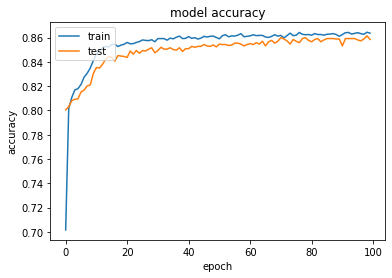

In [21]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

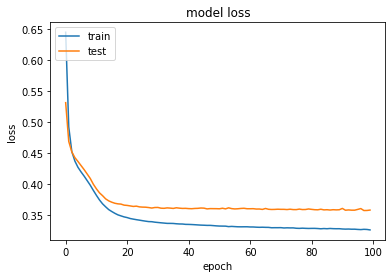

In [22]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [25]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [26]:
score

0.854